# Лабораторная работа №5
# Рекурсия. Фракталы.

## Лушин Евгений Александрович БФИ2001
***

### Задание:
Реализовать генерацию заданного типа фрактала с применением рекурсивных функций.


Добавить возможность задания глубины фрактала. 


Оценить глубину рекурсии. 


Построить таблицу зависимости времени построения от глубины фрактала.

### Список фракталов:

Кривая Коха
| Кривая Гильберта
| Кривая Серпинского
| Салфетка Серпинского
| Ковер Серпинского
| Дерево Пифагора 

### Выполнение:

### 1) Кривая Коха

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, cos, sin, pi
from time import perf_counter

Кривая Коха с глубиной 0: 0.03130889999999997
Кривая Коха с глубиной 1: 0.0359484000000001
Кривая Коха с глубиной 2: 0.03879009999999994
Кривая Коха с глубиной 3: 0.05371589999999982
Кривая Коха с глубиной 4: 0.19984780000000013


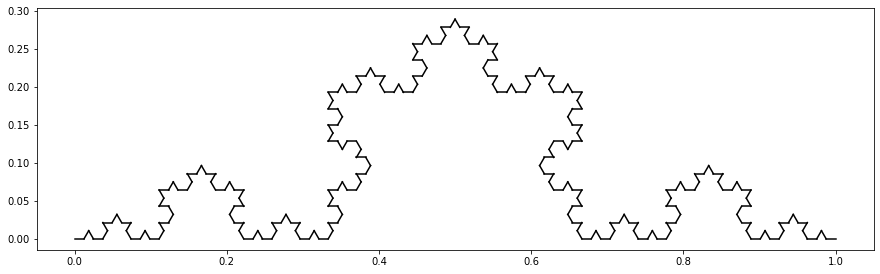

In [2]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
cos60 = cos(pi / 3)
sin60 = sin(pi / 3)

def draw_Koch_curve(depth: int, x1: float, y1: float, x2: float, y2: float):
    vector_x, vector_y = x2 - x1, y2 - y1
    line1_x1, line1_y1 = x1, y1
    line1_x2, line1_y2 = vector_x/3 + line1_x1, vector_y/3 + line1_y1
    line2_x1, line2_y1 = line1_x2, line1_y2
    line2_x2 = (vector_x*cos60 - vector_y*sin60)/3 + line2_x1
    line2_y2 = (vector_x*sin60 + vector_y*cos60)/3 + line2_y1
    line3_x1, line3_y1 = line2_x2, line2_y2
    line3_x2, line3_y2 = vector_x*2/3 + line1_x1, vector_y*2/3 + line1_y1
    l4_x1, l4_y1 = line3_x2, line3_y2
    l4_x2, l4_y2 = x2, y2
    
    if depth == 0:
        plt.plot([x1, x2], [y1, y2], marker='', color='k')
        
    elif depth == 1:
        plt.plot([line1_x1, line1_x2], [line1_y1, line1_y2], [line2_x1, line2_x2], [line2_y1, line2_y2],
                 [line3_x1, line3_x2], [line3_y1, line3_y2], [l4_x1, l4_x2], [l4_y1, l4_y2], marker='', color='k')
        
    else:
        draw_Koch_curve(depth - 1, line1_x1, line1_y1, line1_x2, line1_y2)
        draw_Koch_curve(depth - 1, line2_x1, line2_y1, line2_x2, line2_y2)
        draw_Koch_curve(depth - 1, line3_x1, line3_y1, line3_x2, line3_y2)
        draw_Koch_curve(depth - 1, l4_x1, l4_y1, l4_x2, l4_y2)

        

for depth in range(5):
    start = perf_counter()
    ax.clear()
    draw_Koch_curve(depth, 0, 0, 1, 0) #(<глубина>, <x1>, <y1>, <x2>, <y2>)
    stop = perf_counter()
    print(f'Кривая Коха с глубиной {depth}: {stop - start}')

### 2) Кривая Гильберта

Кривая Гильберта с глубиной 1: 0.03493250000000003
Кривая Гильберта с глубиной 2: 0.03795129999999958
Кривая Гильберта с глубиной 3: 0.0603372000000002
Кривая Гильберта с глубиной 4: 0.14465710000000076


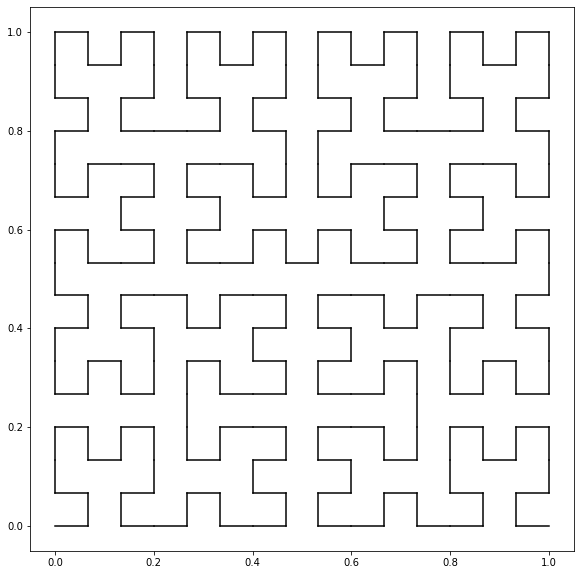

In [3]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')

def draw_Hilbert_curve(depth: int, x1: float, y1: float, x2: float, y2: float):
    assert depth >= 1, "Depth must be bigger then 0"
    
    if depth == 1: 
        vector_x, vector_y = x2 - x1, y2 - y1
        line1_x1, line1_y1 = x1, y1
        line1_x2, line1_y2 = x1 - vector_y, vector_x + y1
        line2_x1, line2_y1 = line1_x2, line1_y2
        line2_x2, line2_y2 = vector_x + line2_x1, vector_y + line2_y1
        line3_x1, line3_y1 = line2_x2, line2_y2
        line3_x2, line3_y2 = x2, y2
        
        plt.plot([line1_x1, line1_x2], [line1_y1, line1_y2], [line2_x1, line2_x2], [line2_y1, line2_y2],
                 [line3_x1, line3_x2], [line3_y1, line3_y2], marker='', color='k')
        
    else:
        all_part = 2 ** (depth - 1)
        step = 1 / (2 * all_part - 1)
        first_part = (all_part - 1) * step
        second_part = all_part * step
        vector_x, vector_y = x2 - x1, y2 - y1
        
        figure1_x1, figure1_y1 = x1 - vector_y * first_part, vector_x * first_part + y1
        figure1_x2, figure1_y2 = x1, y1
        figure2_x1, figure2_y1 = x1 - vector_y * second_part, vector_x * second_part + y1
        figure2_x2, figure2_y2 = vector_x * first_part + figure2_x1, vector_y * first_part + figure2_y1
        figure3_x1, figure3_y1 = vector_x * second_part + figure2_x1, vector_y * second_part + figure2_y1
        figure3_x2, figure3_y2 = figure2_x1 + vector_x, figure2_y1 + vector_y
        figure4_x1, figure4_y1 = x2, y2
        figure4_x2, figure4_y2 = vector_x + figure1_x1, vector_y + figure1_y1
        
        draw_Hilbert_curve(depth - 1, figure1_x1, figure1_y1, figure1_x2, figure1_y2)
        draw_Hilbert_curve(depth - 1, figure2_x1, figure2_y1, figure2_x2, figure2_y2)
        draw_Hilbert_curve(depth - 1, figure3_x1, figure3_y1, figure3_x2, figure3_y2)
        draw_Hilbert_curve(depth - 1, figure4_x1, figure4_y1, figure4_x2, figure4_y2)
        plt.plot([figure1_x1, figure2_x1], [figure1_y1, figure2_y1], [figure2_x2, figure3_x1], 
                 [figure2_y2, figure3_y1], [figure3_x2, figure4_x2], [figure3_y2, figure4_y2], marker='', color='k')



for depth in range(1, 5):
    start = perf_counter()
    ax.clear()
    draw_Hilbert_curve(depth, 0, 0, 1, 0) #(<глубина>, <x1>, <y1>, <x2>, <y2>)
    stop = perf_counter()
    print(f'Кривая Гильберта с глубиной {depth}: {stop - start}')

### 3) Кривая Серпинского

In [4]:
import turtle
import datetime

def depth_timer(func, max_n, doneTurtle = False, step = 200):
    turtle.speed(10000000)
    for i in range(1, max_n + 1):
        turtle.reset()
        turtle.speed(10000000)
        start_time = datetime.datetime.now()
        func(step, i)
        total_time = (datetime.datetime.now() - start_time).total_seconds()
        print(f"Кривая Серпинского с глубиной: {i} - {round(total_time, 1)}s")
    if doneTurtle: turtle.done()
        
# Кривая Серпинского
sqrt2 = sqrt(2)
def Sierpinski_curve_line(step, n):
    if n == 0: 
        turtle.forward(step)
        return
    Sierpinski_curve_line(step, n - 1)
    turtle.left(45)
    turtle.forward(step * sqrt2)
    turtle.left(45)
    Sierpinski_curve_line(step, n - 1)
    turtle.right(90)
    turtle.forward(step)
    turtle.right(90)
    Sierpinski_curve_line(step, n - 1)
    turtle.left(45)
    turtle.forward(step * sqrt2)
    turtle.left(45)
    Sierpinski_curve_line(step, n - 1)

def draw_Sierpinski_curve(step, n):
    turtle.right(45)
    Sierpinski_curve_line(step, n)
    turtle.right(90)
    turtle.forward(step)
    turtle.right(90)
    Sierpinski_curve_line(step, n)
    turtle.right(90)
    turtle.forward(step)
    turtle.right(90)

depth_timer(draw_Sierpinski_curve, 4, step=10)

Кривая Серпинского с глубиной: 1 - 0.5s
Кривая Серпинского с глубиной: 2 - 2.0s
Кривая Серпинского с глубиной: 3 - 8.1s
Кривая Серпинского с глубиной: 4 - 32.1s


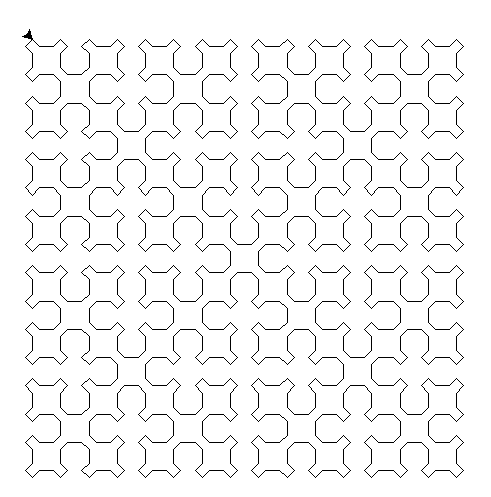

### 4) Салфетка Серпинского

Салфетка Серпинского с глубиной 1: 0.03356830000000599
Салфетка Серпинского с глубиной 2: 0.02902549999999593
Салфетка Серпинского с глубиной 3: 0.030139699999999436
Салфетка Серпинского с глубиной 4: 0.03573029999999733


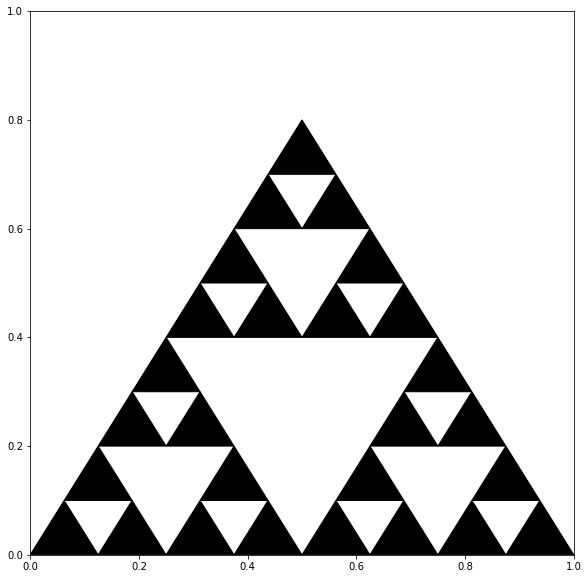

In [5]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')

def Sierpinski_triangle(depth: int, x1: float, y1: float, x2: float, y2: float,
                       x3: float, y3: float):
    
    assert depth >= 1, "Depth must be bigger then 0"
    
    if depth == 1:
        plt.gca().add_patch(plt.Polygon([[x1, y1], [x2, y2], [x3, y3]], color='k')) 
        
    else:
        figure1_x1, figure1_y1 = x1, y1
        figure1_x2, figure1_y2 = (x2 - x1) / 2 + x1, (y2 - y1) / 2 + y1
        figure1_x3, figure1_y3 = (x3 - x1) / 2 + x1, (y3 - y1) / 2 + y1
    
        figure2_x2, figure2_y2 = x2, y2
        figure2_x1, figure2_y1 = figure1_x2, figure2_y2
        figure2_x3, figure2_y3 = (x3 - x2) / 2 + x2, (y3 - y2) / 2 + y2
        
        figure3_x1, figure3_y1 = figure1_x3, figure1_y3
        figure3_x2, figure3_y2 = figure2_x3, figure2_y3
        figure3_x3, figure3_y3 = x3, y3
        
        Sierpinski_triangle(depth - 1, figure1_x1, figure1_y1, figure1_x2, figure1_y2, figure1_x3, figure1_y3)
        Sierpinski_triangle(depth - 1, figure2_x1, figure2_y1, figure2_x2, figure2_y2, figure2_x3, figure2_y3)
        Sierpinski_triangle(depth - 1, figure3_x1, figure3_y1, figure3_x2, figure3_y2, figure3_x3, figure3_y3)
        
 

for depth in range(1, 5):
    start = perf_counter()
    ax.clear()
    Sierpinski_triangle(depth, 0, 0, 1, 0, 0.5, 0.8) #(<глубина>, <x1>, <y1>, <x2>, <y2>, <x3>, <y3>)
    stop = perf_counter()
    print(f'Салфетка Серпинского с глубиной {depth}: {stop - start}')

### 5) Ковер Серпинского 

Ковёр Серпинского с глубиной 1: 0.02846449999999834
Ковёр Серпинского с глубиной 2: 0.034439799999994136
Ковёр Серпинского с глубиной 3: 0.04489029999999872
Ковёр Серпинского с глубиной 4: 0.17849040000000116


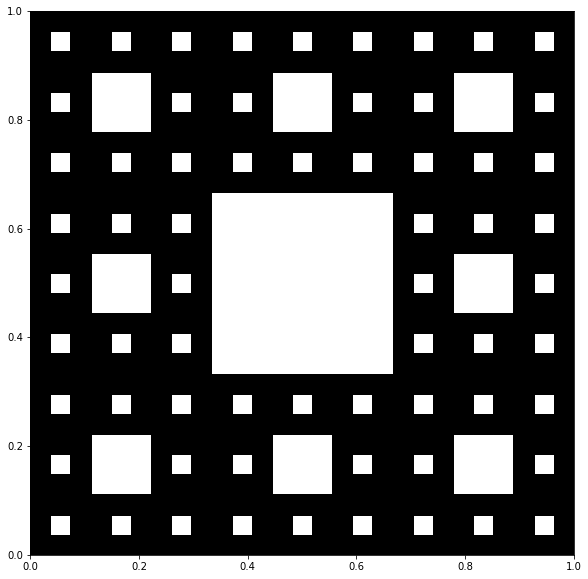

In [6]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')

def Sierpinski_square(depth: int, x1: float, y1: float, x2: float, y2: float):
    assert depth >= 1, "Depth must be bigger then 0"
    
    if depth == 1:
        vector_x, vector_y = x2 - x1, y2 - y1
        x3, y3 = x2 - vector_y, vector_x + y2
        x4, y4 = x1 - vector_y, vector_x + y1
        
        plt.gca().add_patch(plt.Polygon([[x1, y1], [x2, y2], [x3, y3], [x4, y4]], color='k')) 
        
    else:
        vector_x, vector_y = x2 - x1, y2 - y1
        up_x, up_y = -vector_y / 3, vector_x / 3
        
        figure1_x1, figure1_y1 = x1, y1
        figure1_x2, figure1_y2 = vector_x / 3 + x1, vector_y / 3 + y1

        figure2_x1, figure2_y1 = figure1_x2, figure1_y2
        figure2_x2, figure2_y2 = 2 * vector_x / 3 + x1, 2 * vector_y / 3 + y1

        figure3_x1, figure3_y1 = figure2_x2, figure2_y2
        figure3_x2, figure3_y2 = x2, y2

        figure4_x1, figure4_y1 = figure1_x1 + up_x, figure1_y1 + up_y
        figure4_x2, figure4_y2 = figure1_x2 + up_x, figure1_y2 + up_y

        figure5_x1, figure5_y1 = figure3_x1 + up_x, figure3_y1 + up_y
        figure5_x2, figure5_y2 = figure3_x2 + up_x, figure3_y2 + up_y

        figure6_x1, figure6_y1 = figure4_x1 + up_x, figure4_y1 + up_y
        figure6_x2, figure6_y2 = figure4_x2 + up_x, figure4_y2 + up_y

        figure7_x1, figure7_y1 = figure2_x1 + up_x * 2, figure2_y1 + up_y * 2
        figure7_x2, figure7_y2 = figure2_x2 + up_x * 2, figure2_y2 + up_y * 2
        
        figure8_x1, figure8_y1 = figure5_x1 + up_x, figure5_y1 + up_y
        figure8_x2, figure8_y2 = figure5_x2 + up_x, figure5_y2 + up_y
        
        Sierpinski_square(depth - 1, figure1_x1, figure1_y1, figure1_x2, figure1_y2)
        Sierpinski_square(depth - 1, figure2_x1, figure2_y1, figure2_x2, figure2_y2)
        Sierpinski_square(depth - 1, figure3_x1, figure3_y1, figure3_x2, figure3_y2)
        Sierpinski_square(depth - 1, figure4_x1, figure4_y1, figure4_x2, figure4_y2)
        Sierpinski_square(depth - 1, figure5_x1, figure5_y1, figure5_x2, figure5_y2)
        Sierpinski_square(depth - 1, figure6_x1, figure6_y1, figure6_x2, figure6_y2)
        Sierpinski_square(depth - 1, figure7_x1, figure7_y1, figure7_x2, figure7_y2)
        Sierpinski_square(depth - 1, figure8_x1, figure8_y1, figure8_x2, figure8_y2)


for depth in range(1, 5):
    start = perf_counter()
    ax.clear()
    Sierpinski_square(depth, 0, 0, 1, 0) #(<глубина>, <x1>, <y1>, <x2>, <y2>)
    stop = perf_counter()
    print(f'Ковёр Серпинского с глубиной {depth}: {stop - start}')

### 5) Дерево Пифагора

Дерево Пифагора с глубиной 1: 0.058619600000000105
Дерево Пифагора с глубиной 2: 0.054732100000002504
Дерево Пифагора с глубиной 3: 0.14842720000000043
Дерево Пифагора с глубиной 4: 0.05827769999999788


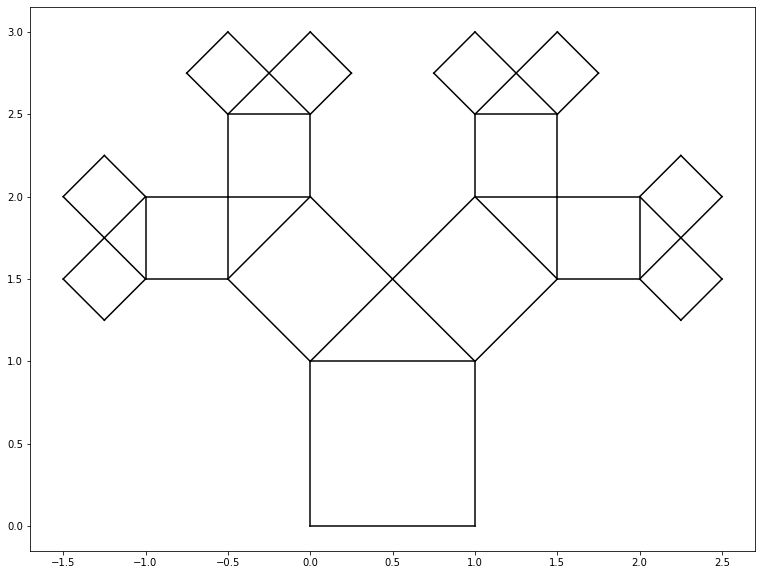

In [7]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')

def tree_of_Pythagoras(depth: int, x1: float, y1: float, x2: float, y2: float):
    assert depth >= 1, "Depth must be bigger then 0"
    vector_x, vector_y = x2 - x1, y2 - y1
    x3, y3 = x2 - vector_y, vector_x + y2
    x4, y4 = x1 - vector_y, vector_x + y1

    if depth == 1:
        plt.plot([x1, x2], [y1, y2], [x2, x3], [y2, y3],
                 [x3, x4], [y3, y4], [x4, x1], [y4, y1], marker='', color='k')

    else:
        figure1_x1, figure1_y1 = x4, y4
        figure1_x2, figure1_y2 = (vector_x - vector_y * 3) / 2 + x1, (vector_y + vector_x * 3) / 2 + y1

        figure2_x1, figure2_y1 = figure1_x2, figure1_y2
        figure2_x2, figure2_y2 = x3, y3

        tree_of_Pythagoras(depth - 1, figure1_x1, figure1_y1, figure1_x2, figure1_y2)
        tree_of_Pythagoras(depth - 1, figure2_x1, figure2_y1, figure2_x2, figure2_y2)
        tree_of_Pythagoras(1, x1, y1, x2, y2)


for depth in range(1, 5):
    start = perf_counter()
    ax.clear()
    tree_of_Pythagoras(4, 0, 0, 1, 0) #(<глубина>, <x1>, <y1>, <x2>, <y2>)
    stop = perf_counter()
    print(f'Дерево Пифагора с глубиной {depth}: {stop - start}')

### Вывод